# Description
This is a simplified version of distrb_analysis.ipynb where measured ranges are compared with pFBA computed fluxes
 

In [65]:
import pandas as pd
import os,sys
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (3, 3),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [66]:
df = pd.read_excel('./k-ecoli-data/ncomms13806-s3.xlsx', sheet_name='Flux_Dataset', skiprows=[0,1], usecols="B:AG")
df = df.set_index('Strain')
#df = df/df.values[0,:] # Normalize with respect to growth rate/dilution rate
df = df.iloc[1:] # Drop growth rate/dilution rate row
df.index.name = 'Reaction'
df.head()

,Δpgm,Δpgi,ΔpfkA,ΔpfkB,Δfbp,ΔfbaB,ΔgpmA,ΔgpmB,ΔpykA,ΔpykF,...,wt@aerobic_1,wt@aerobic_2,wt@aerobic_3,wt@aerobic_4,wt@anaer,Δldh@anaer,wt@pyr,Δgnd@pyr,Δzwf@pyr,wt@ac
Reaction,,,,,,,,,,,,,,,,,,,,,
ACALD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.10,0.10,0.00,51.0,63.0,NaN,NaN,NaN,NaN
ACONTa,93.0,67.0,82.0,76.0,82.0,80.0,80.0,104.0,83.0,73.0,...,102.30,83.00,86.16,71.95,NaN,NaN,48.8,46.9,41.8,72.8
AKGDH,74.0,33.0,64.0,43.0,43.0,58.0,64.0,89.0,57.0,34.0,...,92.48,49.72,68.07,39.55,NaN,NaN,45.4,43.3,38.1,49.1
CS,93.0,67.0,82.0,76.0,82.0,80.0,80.0,104.0,83.0,73.0,...,102.30,83.00,86.16,71.95,NaN,NaN,48.8,46.9,41.8,72.8
EX_akg(e),8.0,9.0,9.0,9.0,9.0,9.0,9.0,7.0,9.0,9.0,...,7.40,8.80,8.40,9.00,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
fluxes = pd.read_csv('../flux_analysis/std.csv')
fluxes = fluxes.drop(['eqn','stdev'],axis=1)
fluxes = fluxes.set_index('id')
fluxes.head()

,etoh_pdc,ppoh,btoh,ibutoh,ptoh,btd,pyr,lac__D,ac,adpac,etylace,ppylace,ibutylace,etylbte,ppylbte,btylbte,ibutylbte,etylpte,ibutylpte,ptylpte
id,,,,,,,,,,,,,,,,,,,,
Htex,-0.413176,-2.287208,-0.413174,-0.125256,-0.839567,-1.084808,-2.970013,-1.997698,-5.600841,-2.193506,-1.998522,-2.399409,-1.991867,-1.475875,-0.346489,-1.184134,-1.041392,-0.346485,-0.284210,-0.811176
EX_h_e,0.413176,2.287208,0.413174,0.125256,0.839567,1.084808,2.970013,1.997698,5.600841,2.193506,1.998522,2.399409,1.991867,1.475875,0.346489,1.184134,1.041392,0.346485,0.284210,0.811176
EX_co2_e,1.648306,0.403393,1.648307,1.867575,1.415167,1.020274,-0.954741,-0.008297,-1.809667,0.237115,-0.005324,0.032319,0.142327,0.550564,1.354787,0.844350,0.953810,1.354790,1.476981,1.219402
CO2tex,-1.648306,-0.403393,-1.648307,-1.867575,-1.415167,-1.020274,0.954741,0.008297,1.809667,-0.237115,0.005324,-0.032319,-0.142327,-0.550564,-1.354787,-0.844350,-0.953810,-1.354790,-1.476981,-1.219402
CO2tpp,-1.648306,-0.403393,-1.648307,-1.867575,-1.415167,-1.020274,0.954741,0.008297,1.809667,-0.237115,0.005324,-0.032319,-0.142327,-0.550564,-1.354787,-0.844350,-0.953810,-1.354790,-1.476981,-1.219402


In [179]:
fluxes.loc['EX_pyr_e',:]

etoh_pdc     0.000000
ppoh         0.000000
btoh         0.000000
ibutoh       0.000000
ptoh         0.000000
btd          0.000000
pyr          0.920454
lac__D       0.000000
ac           0.000000
adpac        0.000000
etylace      0.000000
ppylace      0.000000
ibutylace    0.000000
etylbte      0.000000
ppylbte      0.000000
btylbte      0.000000
ibutylbte    0.000000
etylpte      0.000000
ibutylpte    0.000000
ptylpte      0.000000
Name: EX_pyr_e, dtype: float64

In [84]:
rmap = pd.read_csv('rxnlist_map.csv')
rmap = rmap.dropna(how="any")
model2paper = dict(zip(rmap.model_id, rmap.paper_id))
paper2model = dict(zip(rmap.paper_id, rmap.model_id))

In [186]:
# Common reactions paper
idx = set(df.index)
common_rxns = idx.intersection(paper2model.keys())
flx_p = df.loc[common_rxns,:]
flx_p.index = flx_p.index.map(paper2model)

# Common reactions model
idx = set(fluxes.index)
common_rxns_m = idx.intersection({paper2model[rxn] for rxn in common_rxns})
flx_m = fluxes.loc[common_rxns_m,:]
flx_m = flx_m*100
negate= ['LDH_D', 'ACALD', 'FUM', 'MDH']
flx_m.loc[negate,:] = -flx_m.loc[negate,:]

In [187]:
rxns = list(flx_p.index)
df1 = flx_p.transpose()
df1['type'] = 'paper'

df2 = flx_m.transpose()
df2['type'] = 'model'

cdf = pd.concat([df1,df2], sort=False)
cdf['case'] = cdf.index
mdf = pd.melt(cdf, id_vars=['case', 'type'], value_vars=rxns)
mdf.head()

,case,type,variable,value
0,Δpgm,paper,MDH,96.0
1,Δpgi,paper,MDH,81.0
2,ΔpfkA,paper,MDH,81.0
3,ΔpfkB,paper,MDH,90.0
4,Δfbp,paper,MDH,95.0


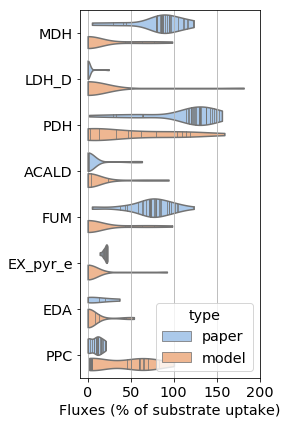

In [195]:
colors = sns.color_palette("pastel")
fig, ax = plt.subplots(figsize=[4,6])
#sns.violinplot(y="variable", x="value", hue="type", data=mdf, palette="pastel", cut=0, split=True, scale="count", inner="stick")
sns.violinplot(y="variable", x="value", hue="type", data=mdf, palette="pastel", cut=0,  scale="count", inner="stick")
ax.xaxis.set_label_text('Fluxes (% of substrate uptake)')
ax.yaxis.set_label_text('')
#ax.set_xlim([xlims])
ax.xaxis.set_ticks([0,50,100,150, 200]);
#ax.set_xticks([0, 50, 150, 30], minor=True)
ax.xaxis.grid(True, which='major')
plt.tight_layout()
plt.savefig('violin.svg')

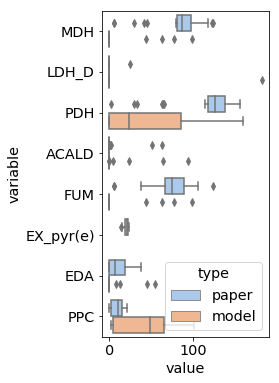

In [164]:
fig, ax = plt.subplots(figsize=[3,6])
sns.boxplot(y="variable", x="value", hue="type", data=mdf, palette="pastel")

---